# Time Series Analysis of Superstore Sales


This project explores **time series analysis** on sales data from a superstore, focusing on **sequential data patterns** over 

time. The analysis involves **visualizing trends, seasonality, and cyclic behavior** to understand sales fluctuations. 

Additionally, an **SARIMA model** is fitted to the data to generate accurate **sales forecasts**, helping to uncover potential 

future trends and business insights.


<br>

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

In [63]:
df=pd.read_csv("Dataset- Superstore (2015-2018).csv")

In [64]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [65]:
df.shape

(9994, 21)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## Load data and set index 

In [68]:
df_sales=df[['Order Date','Sales']]
df_sales=pd.DataFrame(df_sales)
df_sales['Order Date']=pd.to_datetime(df_sales['Order Date'])
print(df_sales.head())

  Order Date     Sales
0 2016-11-08  261.9600
1 2016-11-08  731.9400
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680


In [69]:
# date as index 
df_sales.set_index("Order Date", inplace=True)

In [71]:
df_monthly_sale=df_sales.resample("M").mean()
df_monthly_sale.head()

/var/folders/1v/s15wh88s2g743th0_sw7qz4r0000gn/T/ipykernel_95303/4128590114.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sale=df_sales.resample("M").mean()


,Sales
Order Date,
2014-01-31,180.213861
2014-02-28,98.258522
2014-03-31,354.719803
2014-04-30,209.595148
2014-05-31,193.838418


## Monthly sale plot

<Figure size 1800x600 with 0 Axes>

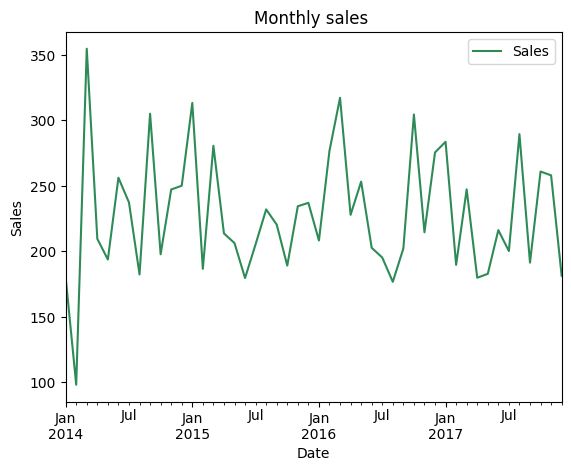

In [81]:
plt.figure(figsize=(18,6))
df_monthly_sale.plot(c="seagreen")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly sales ")
plt.show()

## Seasonal Decomposition of Monthly Sales

The time series decomposition breaks down the monthly sales data into four components:
- **Observed**: The original sales values.
- **Trend**: The overall long-term movement.
- **Seasonality**: Repeating cycles that occur every 12 months.
- **Residual (Noise)**: The remaining variations after removing trend and seasonality.

The following plots visualize each of these components:


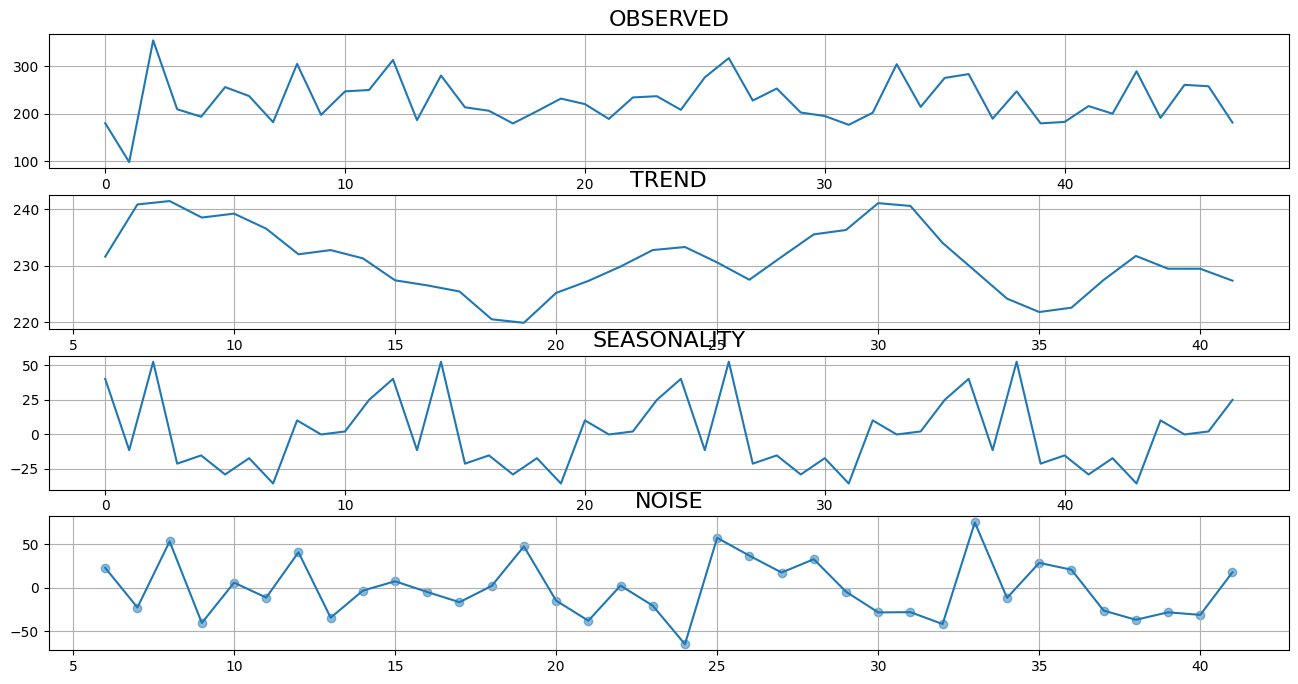

In [86]:

res = seasonal_decompose(df_monthly_sale.values, period=12)
observed = res.observed   # The original demand values
trend = res.trend         # The smooth long-term pattern
seasonal = res.seasonal   # Repeating daily or weekly cycles
residual = res.resid      # Unexplained noise
fig, axs = plt.subplots(4, figsize=(16,8))

axs[0].set_title('OBSERVED', fontsize=16)
axs[0].plot(observed)  
axs[0].grid()

axs[1].set_title('TREND', fontsize=16)
axs[1].plot(trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=16)
axs[2].plot(seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=16)
axs[3].plot(residual)
axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)  # Adds scatter points
axs[3].grid()


<br>

## Smoothing Analysis Using Moving Averages

To better understand trends in the sales data, we apply **moving averages** with different window sizes:
- **Quarterly Moving Average (3-Month)**: Helps smooth short-term fluctuations.
- **6-Month Moving Average**: Provides a broader view of trends.

Below, the smoothed sales trends are plotted alongside the original sales data.


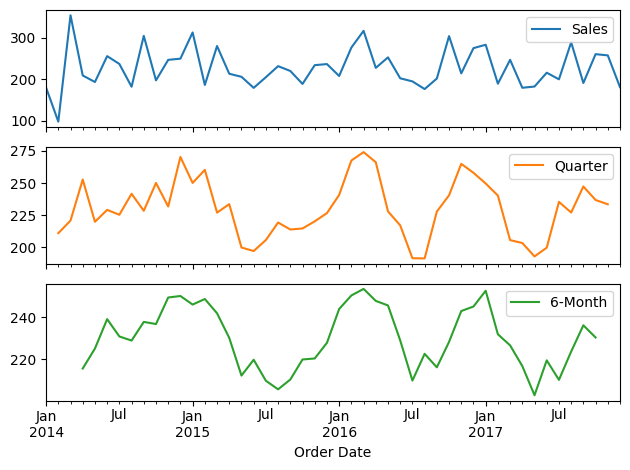

In [95]:
# Smoothing analysis by a moving average
df_monthly_sale["Quarter"] = df_monthly_sale["Sales"].rolling(window=3, center=True).mean()
df_monthly_sale["6-Month"] = df_monthly_sale["Sales"].rolling(window=6, center=True).mean()
df_monthly_sale[["Sales","Quarter","6-Month"]].plot(subplots=True)
plt.tight_layout()
plt.show()

<br>

## Two-Sided View of Monthly Sales


- The **filled area** represents the magnitude of sales changes over time.

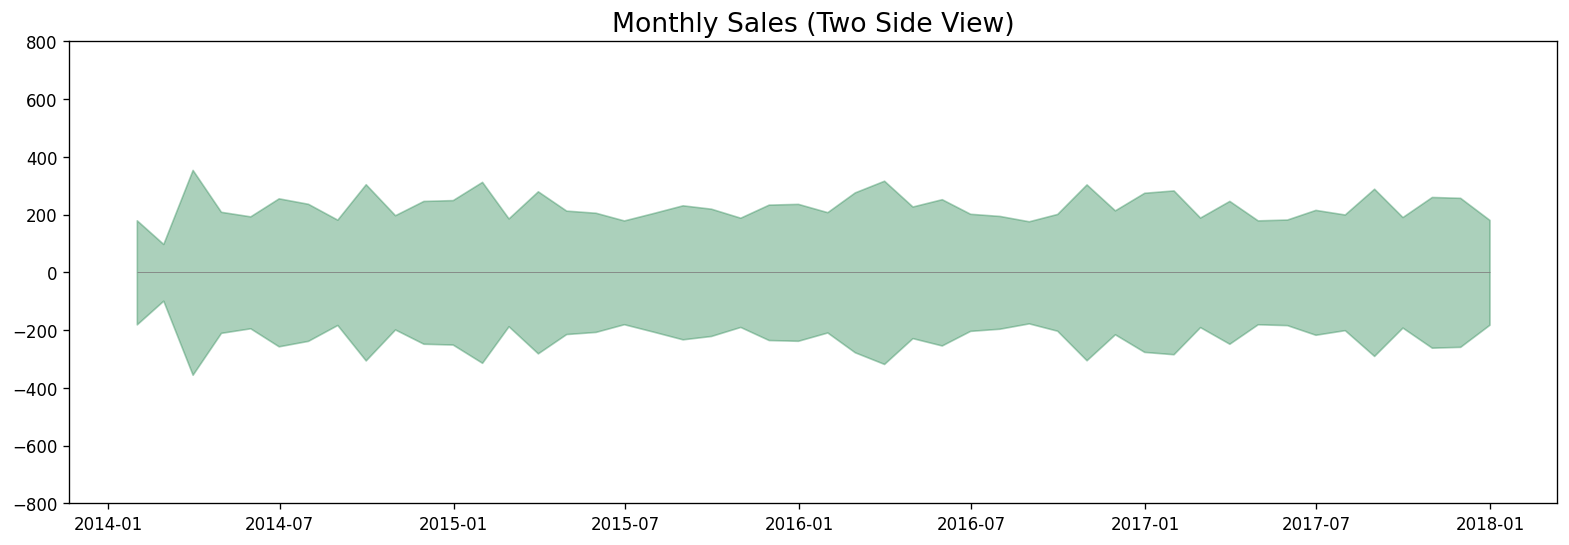

In [100]:

x = df_monthly_sale.index
y1 = df_monthly_sale["Sales"].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1, -y1, alpha=0.4, linewidth=1, color='seagreen')  # Corrected fill_between
plt.ylim(-800, 800)
plt.title('Monthly Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=x.min(), xmax=x.max(), linewidth=0.5, color='grey')  # Ensure x-axis line is visible
plt.show()

## ADF Test to Check statioarity 

In [110]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_monthly_sale["Sales"])

print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Number of Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


print("--"*50)
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
print("--"*50)

Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.2865668298704285
p-value: 0.01548972019109736
Number of Lags Used: 10
Number of Observations Used: 37
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627
----------------------------------------------------------------------------------------------------
Stationary
----------------------------------------------------------------------------------------------------


## Plot Auto Correlation Function , Partial Auto Correlation Function 

[ 1.         -0.20419575  0.01111319  0.11694159 -0.18690844 -0.25504642
  0.01967377 -0.07880354  0.05922442 -0.05991518  0.23578545 -0.18428896
  0.04051244 -0.04166198 -0.01097678 -0.03849897 -0.00263465  0.09038657
  0.01602728 -0.11091501  0.0861536 ]


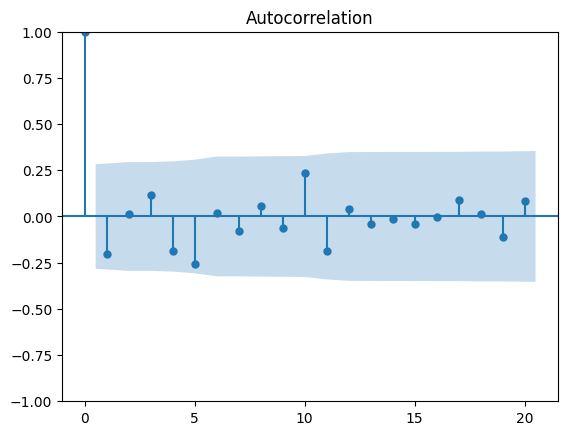

In [104]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
# Compute the ACF values
acf_array = acf(df_monthly_sale["Sales"], nlags=20)  
print(acf_array)

# Plot ACF
plot_acf(df_monthly_sale["Sales"], lags=20)
plt.show()

[ 1.         -0.20854034 -0.03334275  0.12589214 -0.16081795 -0.39013827
 -0.17213517 -0.0918974   0.07664045 -0.21930958  0.11579631 -0.30130871
 -0.09939998 -0.24306537 -0.01814504 -0.10926877 -0.30529656 -0.01205482
 -0.22356134 -0.35200296 -0.61713819]


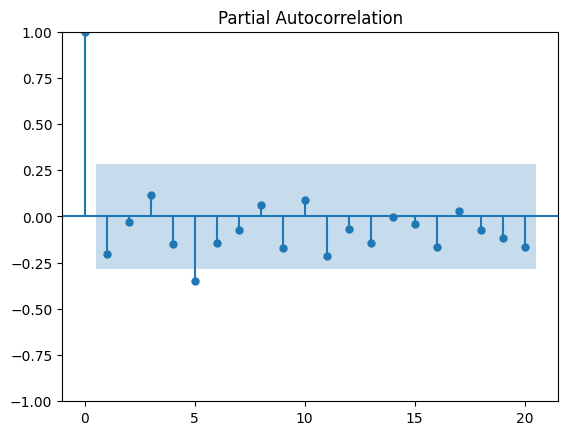

In [107]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_array = pacf(df_monthly_sale["Sales"], nlags=20)  
print(pacf_array)

# Plot ACF
plot_pacf(df_monthly_sale["Sales"], lags=20)
plt.show()

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(df_monthly_sale["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()
print(fitted_model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15152D+00    |proj g|=  2.74080D-01

At iterate    5    f=  4.06571D+00    |proj g|=  1.57031D-02

At iterate   10    f=  4.05982D+00    |proj g|=  4.46554D-03

At iterate   15    f=  4.03337D+00    |proj g|=  1.65492D-02

At iterate   20    f=  4.02336D+00    |proj g|=  3.56601D-02

At iterate   25    f=  4.01887D+00    |proj g|=  6.39451D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   

## Model Diagnostic

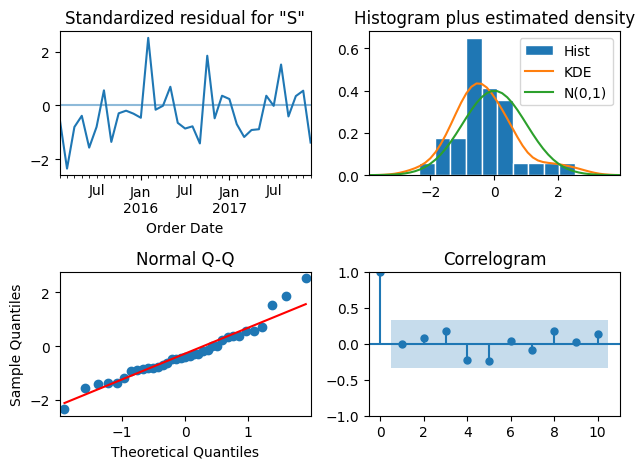

In [122]:
fitted_model.plot_diagnostics()
plt.tight_layout()
plt.show()

## Forcast future values 

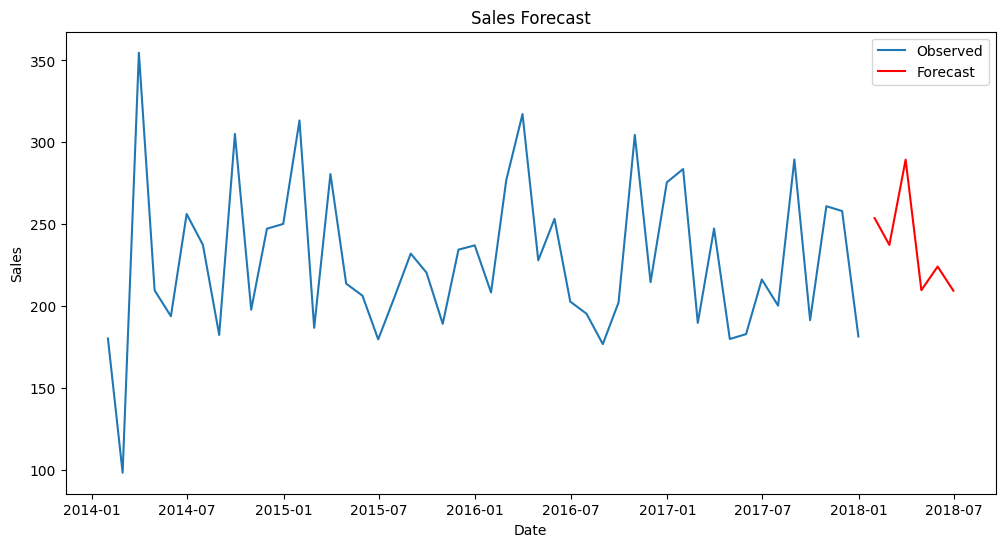

In [128]:
# Forecast future values
 
forecast_mean = fitted_model.get_forecast(steps=6).predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sale["Sales"], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()